In [1]:
import pandas as pd
import evds
import numpy as np
import matplotlib.pyplot as plt
from lazypredict.Supervised import LazyRegressor
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from datetime import date
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn import linear_model
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import combinations
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.api import VAR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import ParameterGrid
import numpy as np
import seaborn as sns
import warnings
from sklearn.pipeline import make_pipeline
from sklearn.kernel_ridge import KernelRidge
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_friedman2
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import SGDRegressor
import statsmodels.api as sm
import itertools
import pmdarima as pm
from sklearn.pipeline import make_pipeline
from pmdarima.arima import auto_arima
from sklearn.kernel_ridge import KernelRidge		
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.ar_model import AutoReg
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from pmdarima.model_selection import train_test_split
from evds import evdsAPI
import pandas as pd
import numpy as np
import requests
import json
from urllib.parse import urlencode
warnings.filterwarnings("ignore")

In [189]:
buyume=pd.read_excel("gayrisafi yurtici hasila uretim yontemiyle mevsim ve takvim etkisinden arindirilmis zincirlenmis hac.xls")
buyume=buyume.iloc[:33,[1,19,20,21,22]].dropna().T
veri=[]
for i in range(1,len(buyume.columns)):
   veri.append(buyume.iloc[:,i].values[1:])

In [190]:
veri=np.array(veri)
veri=veri.reshape(1,-1)
veri=pd.DataFrame(veri.T)
veri.columns=["Büyüme"]
veri=veri.set_index(pd.date_range(start="1999-03-31",freq="Q",periods=len(veri)))
veri

,Büyüme
1999-03-31,-1.69
1999-06-30,-0.56
1999-09-30,-1.69
1999-12-31,2.99
2000-03-31,1.57
...,...
2022-12-31,1.15
2023-03-31,-0.16
2023-06-30,3.61
2023-09-30,0.31


In [95]:
with open("C:/Users/Bora/Desktop/api.txt") as api:
    key=api.read()

In [96]:
params = {
    'series': "TP.DK.USD.S.YTL",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

usd = formatted_response['items']
usd = pd.DataFrame(usd)


usd = usd.drop(columns=['UNIXTIME','Tarih'])
usd.columns = ['USD/TL']
usd['USD/TL'] = pd.to_numeric(usd['USD/TL'])
usd=usd.set_index(pd.date_range(start="2006-01-31",freq="Q",periods=len(usd)))
usd=usd.pct_change()*100
usd=usd.dropna()
usd

,USD/TL
2006-06-30,9.34
2006-09-30,3.11
2006-12-31,-2.95
2007-03-31,-3.18
2007-06-30,-5.02
...,...
2023-06-30,9.53
2023-09-30,29.66
2023-12-31,6.29
2024-03-31,8.45


In [97]:
params = {
    'series': "TP.KREHACBS.A1",
    'startDate': "31-12-2007",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

kredi = formatted_response['items']
kredi = pd.DataFrame(kredi)


kredi = kredi.drop(columns=['UNIXTIME','Tarih'])
kredi.columns = ['Kredi']
kredi['Kredi'] = pd.to_numeric(kredi['Kredi'])
kredi=kredi.set_index(pd.date_range(start="31-12-2007",freq="Q",periods=len(kredi)))
kredi=kredi.pct_change()*100
kredi=kredi.dropna()
kredi

,Kredi
2008-03-31,8.30
2008-06-30,9.38
2008-09-30,6.21
2008-12-31,2.12
2009-03-31,-2.37
...,...
2023-03-31,12.10
2023-06-30,15.38
2023-09-30,11.52
2023-12-31,8.22


In [98]:
params = {
    'series': "TP.KKHARTUT.KT1",
    'startDate': "31-03-2014",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

kart = formatted_response['items']
kart = pd.DataFrame(kart)


kart = kart.drop(columns=['UNIXTIME','Tarih'])
kart.columns = ['Kart']
kart['Kart'] = pd.to_numeric(kart['Kart'])
kart=kart.set_index(pd.date_range(start="31-03-2014",freq="Q",periods=len(kart)))
kart=kart.pct_change()*100
kart=kart.dropna()
kart

,Kart
2014-06-30,6.76
2014-09-30,4.45
2014-12-31,0.34
2015-03-31,2.98
2015-06-30,10.86
2015-09-30,2.10
2015-12-31,-0.96
2016-03-31,0.43
2016-06-30,7.91
2016-09-30,1.06


In [99]:
params = {
    'series': "TP.CLI2.A01",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

öncü = formatted_response['items']
öncü = pd.DataFrame(öncü)


öncü = öncü.drop(columns=['UNIXTIME','Tarih'])
öncü.columns = ['Öncü Gösterge']
öncü['Öncü Gösterge'] = pd.to_numeric(öncü['Öncü Gösterge'])
öncü=öncü.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(öncü)))
öncü=öncü.pct_change()*100
öncü=öncü.dropna()
öncü

,Öncü Gösterge
1999-06-30,1.97
1999-09-30,-0.09
1999-12-31,2.52
2000-03-31,3.53
2000-06-30,-0.18
...,...
2023-03-31,1.90
2023-06-30,1.16
2023-09-30,0.98
2023-12-31,0.13


In [100]:
params = {
    'series': "TP.IHRACATBEC.9999",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

ihracat = formatted_response['items']
ihracat = pd.DataFrame(ihracat)


ihracat = ihracat.drop(columns=['UNIXTIME','Tarih'])
ihracat.columns = ['İhracat']
ihracat['İhracat'] = pd.to_numeric(ihracat['İhracat'])
ihracat=ihracat.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(ihracat)))
ihracat=ihracat.pct_change()*100
ihracat=ihracat.dropna()
ihracat

,İhracat
2013-06-30,2.94
2013-09-30,-2.84
2013-12-31,6.01
2014-03-31,0.80
2014-06-30,0.07
2014-09-30,-4.06
2014-12-31,2.62
2015-03-31,-6.26
2015-06-30,-2.07
2015-09-30,-7.43


In [101]:
params = {
    'series': "TP.ITHALATBEC.9999",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

ithalat = formatted_response['items']
ithalat = pd.DataFrame(ithalat)


ithalat = ithalat.drop(columns=['UNIXTIME','Tarih'])
ithalat.columns = ['İthalat']
ithalat['İthalat'] = pd.to_numeric(ithalat['İthalat'])
ithalat=ithalat.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(ithalat)))
ithalat=ithalat.pct_change()*100
ithalat=ithalat.dropna()
ithalat

,İthalat
2013-06-30,13.05
2013-09-30,-6.94
2013-12-31,2.39
2014-03-31,-8.64
2014-06-30,6.98
2014-09-30,-3.02
2014-12-31,2.23
2015-03-31,-14.94
2015-06-30,2.66
2015-09-30,-8.07


In [102]:
params = {
    'series': "TP.KTF17",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

tfaiz = formatted_response['items']
tfaiz = pd.DataFrame(tfaiz)


tfaiz = tfaiz.drop(columns=['UNIXTIME','Tarih'])
tfaiz.columns = ['Ticari Faiz']
tfaiz['Ticari Faiz'] = pd.to_numeric(tfaiz['Ticari Faiz'])
tfaiz=tfaiz.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(tfaiz)))
tfaiz=tfaiz.dropna()
tfaiz

,Ticari Faiz
2002-03-31,58.99
2002-06-30,49.07
2002-09-30,45.39
2002-12-31,43.19
2003-03-31,44.61
...,...
2023-06-30,15.25
2023-09-30,33.29
2023-12-31,51.27
2024-03-31,56.01


In [103]:

params = {
    'series': "TP.TRY.MT01",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

mfaiz1ay = formatted_response['items']
mfaiz1ay = pd.DataFrame(mfaiz1ay)


mfaiz1ay = mfaiz1ay.drop(columns=['UNIXTIME','Tarih'])
mfaiz1ay.columns = ['Mevduat Faiz 1Ay']
mfaiz1ay['Mevduat Faiz 1Ay'] = pd.to_numeric(mfaiz1ay['Mevduat Faiz 1Ay'])
mfaiz1ay=mfaiz1ay.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(mfaiz1ay)))
mfaiz1ay=mfaiz1ay.dropna()
mfaiz1ay

,Mevduat Faiz 1Ay
2002-03-31,61.07
2002-06-30,51.75
2002-09-30,50.35
2002-12-31,48.41
2003-03-31,47.92
...,...
2023-06-30,22.67
2023-09-30,26.54
2023-12-31,38.31
2024-03-31,45.40


In [104]:

params = {
    'series': "TP.TRY.MT02",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

mfaiz3ay = formatted_response['items']
mfaiz3ay = pd.DataFrame(mfaiz3ay)


mfaiz3ay = mfaiz3ay.drop(columns=['UNIXTIME','Tarih'])
mfaiz3ay.columns = ['Mevduat Faiz 3Ay']
mfaiz3ay['Mevduat Faiz 3Ay'] = pd.to_numeric(mfaiz3ay['Mevduat Faiz 3Ay'])
mfaiz3ay=mfaiz3ay.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(mfaiz3ay)))
mfaiz3ay=mfaiz3ay.dropna()
mfaiz3ay

,Mevduat Faiz 3Ay
2002-03-31,59.01
2002-06-30,50.47
2002-09-30,50.83
2002-12-31,48.28
2003-03-31,47.05
...,...
2023-06-30,33.63
2023-09-30,35.26
2023-12-31,47.33
2024-03-31,53.39


In [105]:

params = {
    'series': "TP.TSANAYMT2021.Y1",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

sanayi = formatted_response['items']
sanayi = pd.DataFrame(sanayi)


sanayi = sanayi.drop(columns=['UNIXTIME','Tarih'])
sanayi.columns = ['Sanayi']
sanayi['Sanayi'] = pd.to_numeric(sanayi['Sanayi'])
sanayi=sanayi.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(sanayi)))
sanayi=sanayi.pct_change()*100
sanayi=sanayi.dropna()
sanayi

,Sanayi
2005-06-30,-0.62
2005-09-30,3.83
2005-12-31,2.90
2006-03-31,1.52
2006-06-30,1.89
...,...
2023-03-31,-0.26
2023-06-30,2.41
2023-09-30,0.73
2023-12-31,-0.72


In [106]:

params = {
    'series': "TP.PR.ARZ13",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

m2 = formatted_response['items']
m2 = pd.DataFrame(m2)


m2 = m2.drop(columns=['UNIXTIME','Tarih'])
m2.columns = ['M2']
m2['M2'] = pd.to_numeric(m2['M2'])
m2=m2.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(m2)))
m2=m2.pct_change()*100
m2=m2.dropna()
m2

,M2
2006-03-31,1.55
2006-06-30,9.64
2006-09-30,3.88
2006-12-31,4.68
2007-03-31,5.00
...,...
2023-06-30,12.80
2023-09-30,20.87
2023-12-31,9.90
2024-03-31,7.26


In [107]:

params = {
    'series': "TP.PR.ARZ22",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

m3 = formatted_response['items']
m3 = pd.DataFrame(m3)


m3 = m3.drop(columns=['UNIXTIME','Tarih'])
m3.columns = ['M3']
m3['M3'] = pd.to_numeric(m3['M3'])
m3=m3.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(m3)))
m3=m3.pct_change()*100
m3=m3.dropna()
m3

,M3
2006-03-31,1.80
2006-06-30,9.64
2006-09-30,2.74
2006-12-31,3.94
2007-03-31,4.55
...,...
2023-06-30,12.31
2023-09-30,21.02
2023-12-31,10.13
2024-03-31,8.36


In [108]:

params = {
    'series': "TP.FG.J0",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

tüfe = formatted_response['items']
tüfe = pd.DataFrame(tüfe)


tüfe = tüfe.drop(columns=['UNIXTIME','Tarih'])
tüfe.columns = ['TÜFE']
tüfe['TÜFE'] = pd.to_numeric(tüfe['TÜFE'])
tüfe=tüfe.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(tüfe)))
tüfe=tüfe.pct_change()*100
tüfe=tüfe.dropna()
tüfe

,TÜFE
2003-06-30,3.50
2003-09-30,0.74
2003-12-31,2.89
2004-03-31,2.04
2004-06-30,1.56
...,...
2023-06-30,6.40
2023-09-30,21.08
2023-12-31,13.16
2024-03-31,14.45


In [109]:

params = {
    'series': "TP.TUFE1YI.T1",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

üfe = formatted_response['items']
üfe = pd.DataFrame(üfe)


üfe = üfe.drop(columns=['UNIXTIME','Tarih'])
üfe.columns = ['ÜFE']
üfe['ÜFE'] = pd.to_numeric(üfe['ÜFE'])
üfe=üfe.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(üfe)))
üfe=üfe.pct_change()*100
üfe=üfe.dropna()
üfe

,ÜFE
1999-06-30,12.22
1999-09-30,10.77
1999-12-31,15.39
2000-03-31,16.18
2000-06-30,7.15
...,...
2023-06-30,4.29
2023-09-30,18.86
2023-12-31,8.57
2024-03-31,9.73


In [110]:

params = {
    'series': "TP.GY1.N2.MA",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

reelgüven = formatted_response['items']
reelgüven = pd.DataFrame(reelgüven)


reelgüven = reelgüven.drop(columns=['UNIXTIME','Tarih'])
reelgüven.columns = ['Reel Güven']
reelgüven['Reel Güven'] = pd.to_numeric(reelgüven['Reel Güven'])
reelgüven=reelgüven.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(reelgüven)))
reelgüven=reelgüven.pct_change()*100
reelgüven=reelgüven.dropna()
reelgüven

,Reel Güven
2007-06-30,-3.37
2007-09-30,0.99
2007-12-31,-2.44
2008-03-31,-2.99
2008-06-30,-6.58
...,...
2023-06-30,1.94
2023-09-30,-0.41
2023-12-31,-0.64
2024-03-31,-1.34


In [111]:

params = {
    'series': "TP.TG2.Y01",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

tuketicigüven = formatted_response['items']
tuketicigüven = pd.DataFrame(tuketicigüven)


tuketicigüven = tuketicigüven.drop(columns=['UNIXTIME','Tarih'])
tuketicigüven.columns = ['Tüketici Güven']
tuketicigüven['Tüketici Güven'] = pd.to_numeric(tuketicigüven['Tüketici Güven'])
tuketicigüven=tuketicigüven.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(tuketicigüven)))
tuketicigüven=tuketicigüven.pct_change()*100
tuketicigüven=tuketicigüven.dropna()
tuketicigüven

,Tüketici Güven
2012-06-30,-2.66
2012-09-30,-0.10
2012-12-31,-2.94
2013-03-31,4.37
2013-06-30,2.76
2013-09-30,0.11
2013-12-31,0.36
2014-03-31,-3.90
2014-06-30,4.69
2014-09-30,-1.60


In [112]:

params = {
    'series': "TP.KKO.MA",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

imalat = formatted_response['items']
imalat = pd.DataFrame(imalat)


imalat = imalat.drop(columns=['UNIXTIME','Tarih'])
imalat.columns = ['İmalat PMI']
imalat['İmalat PMI'] = pd.to_numeric(imalat['İmalat PMI'])
imalat=imalat.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(imalat)))
imalat=imalat.pct_change()*100
imalat=imalat.dropna()
imalat

,İmalat PMI
2007-06-30,1.88
2007-09-30,-1.37
2007-12-31,-0.41
2008-03-31,-0.90
2008-06-30,0.37
...,...
2023-06-30,1.24
2023-09-30,0.44
2023-12-31,0.92
2024-03-31,-0.43


In [113]:

params = {
    'series': "TP.TIG08",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

işsizlik = formatted_response['items']
işsizlik = pd.DataFrame(işsizlik)


işsizlik = işsizlik.drop(columns=['UNIXTIME','Tarih'])
işsizlik.columns = ['İşsizlik']
işsizlik['İşsizlik'] = pd.to_numeric(işsizlik['İşsizlik'])
işsizlik=işsizlik.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(işsizlik)))
işsizlik=işsizlik.dropna()
işsizlik

,İşsizlik
2014-03-31,9.40
2014-06-30,9.70
2014-09-30,10.07
2014-12-31,10.40
2015-03-31,10.57
2015-06-30,10.30
2015-09-30,10.13
2015-12-31,10.27
2016-03-31,10.17
2016-06-30,10.37


In [175]:
data=pd.concat([veri,ihracat,imalat,ithalat,işsizlik,kart,kredi,m2,m3,mfaiz1ay,mfaiz3ay,tfaiz,öncü,reelgüven,sanayi,tüfe,tuketicigüven,üfe,usd],axis=1)
data["Büyüme"].iloc[-2]=0.0
data=data.dropna()
data=data.astype(float)
data

,Büyüme,İhracat,İmalat PMI,İthalat,İşsizlik,Kart,Kredi,M2,M3,Mevduat Faiz 1Ay,Mevduat Faiz 3Ay,Ticari Faiz,Öncü Gösterge,Reel Güven,Sanayi,TÜFE,Tüketici Güven,ÜFE,USD/TL
2014-06-30,-1.62,0.07,-0.53,6.98,9.70,6.76,2.24,0.47,0.53,9.29,10.53,14.23,2.85,5.49,-1.30,2.62,4.69,0.70,-4.70
2014-09-30,2.46,-4.06,-0.93,-3.02,10.07,4.45,4.97,3.90,3.74,8.10,9.18,12.19,1.19,-1.57,1.51,0.90,-1.60,1.16,2.36
2014-12-31,1.35,2.62,0.27,2.23,10.40,0.34,4.61,2.56,2.64,8.26,9.52,12.79,1.51,1.50,0.60,2.00,-3.18,0.72,4.61
2015-03-31,1.89,-6.26,0.49,-14.94,10.57,2.98,6.83,4.29,4.19,8.55,9.77,12.77,0.90,-2.95,1.13,1.75,-2.87,0.64,8.70
2015-06-30,1.52,-2.07,3.06,2.66,10.30,10.86,6.58,6.85,6.62,9.03,10.24,13.35,0.89,0.84,3.43,2.88,-0.30,3.39,8.48
2015-09-30,1.40,-7.43,-0.04,-8.07,10.13,2.10,5.76,5.76,5.47,9.43,10.83,14.59,1.05,-2.47,1.95,0.50,-3.13,1.39,6.62
2015-12-31,1.17,8.99,0.17,1.59,10.27,-0.96,1.11,2.01,1.80,9.74,11.36,15.67,1.64,3.71,0.32,2.82,7.41,0.07,2.24
2016-03-31,0.36,-5.79,-0.13,-7.92,10.17,0.43,2.10,1.65,1.52,9.94,11.85,16.00,0.42,0.19,0.89,2.16,-1.11,-0.16,1.29
2016-06-30,1.43,6.49,0.17,12.39,10.37,7.91,2.66,2.95,2.86,9.66,11.35,15.62,2.12,-0.57,0.81,1.30,1.27,1.86,-1.72
2016-09-30,-2.87,-11.99,-0.73,-11.71,11.27,1.06,3.02,3.29,3.17,9.04,10.71,14.78,0.82,-0.13,-2.16,1.54,1.69,1.13,2.32


<Axes: >

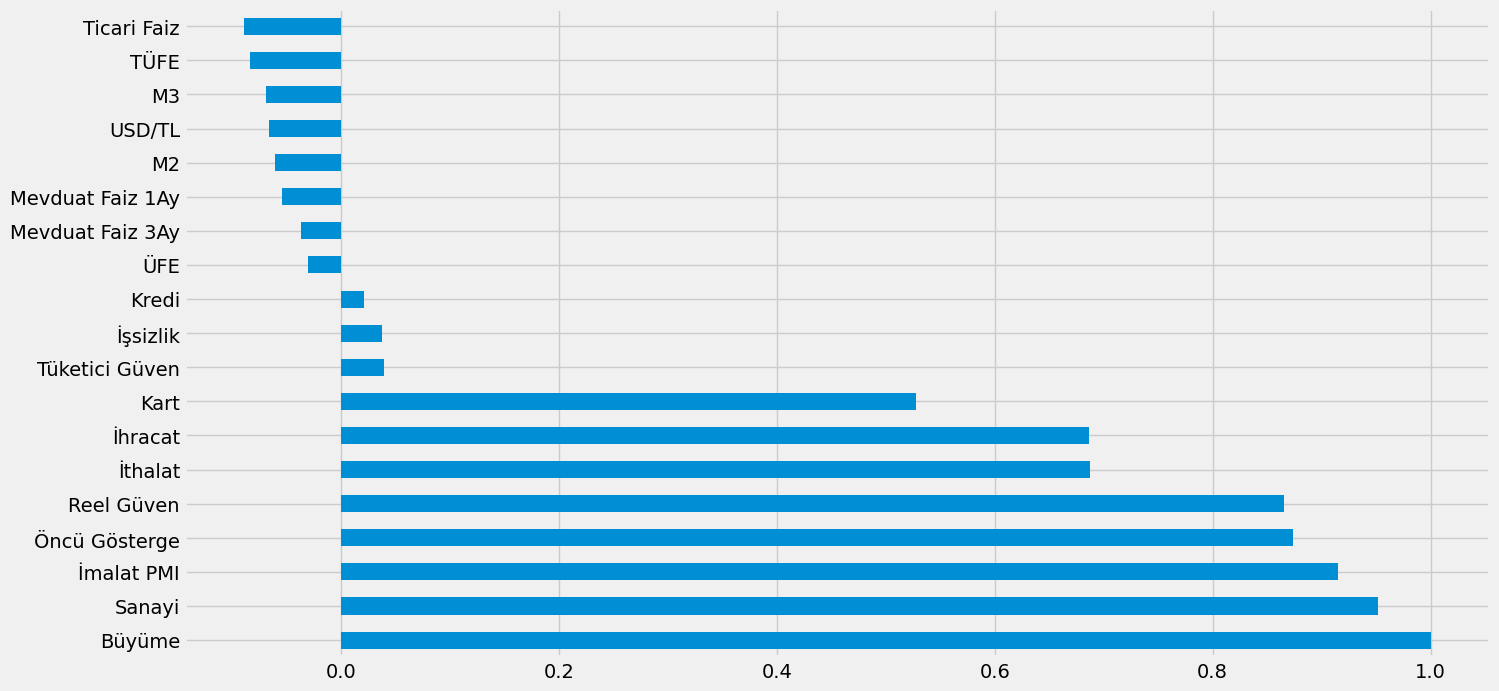

In [124]:
data.corr()["Büyüme"].sort_values(ascending=False).plot(kind="barh",figsize=(15,8))

In [176]:
X=data[["Kart","İhracat","İthalat","Reel Güven","Öncü Gösterge","İmalat PMI","Sanayi"]]
y=data["Büyüme"]
X_train,X_test=X.iloc[:-7,:],X.iloc[-7:,:]
y_train,y_test=y[:-7],y[-7:]
model,tahminler=LazyRegressor(predictions=True).fit(X_train,X_test,y_train,y_test)

100%|██████████| 42/42 [00:01<00:00, 22.45it/s]


In [177]:
tahminler["Büyüme"]=y_test.values
tahminler[["RANSACRegressor","Büyüme"]]

,RANSACRegressor,Büyüme
0,-0.83,0.54
1,0.84,1.15
2,0.11,-0.16
3,3.03,3.61
4,1.42,0.31
5,0.62,0.95
6,1.56,0.00


In [225]:

features=['Kart', 'İhracat', 'İthalat', 'Reel Güven', 'Öncü Gösterge',
       'İmalat PMI', 'Sanayi','Büyüme']
data1=data[features]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler = StandardScaler()
scaled_data["Büyüme"]=scaler.fit_transform(np.array(data1["Büyüme"]).reshape(-1, 1))
scaled_data

,Kart,İhracat,İthalat,Reel Güven,Öncü Gösterge,İmalat PMI,Sanayi,Büyüme
0,-0.22,-0.14,0.59,0.65,0.92,-0.17,-0.44,-0.82
1,-0.43,-0.56,-0.45,-0.24,-0.03,-0.28,0.03,0.37
2,-0.81,0.11,0.10,0.15,0.15,0.04,-0.12,0.05
3,-0.56,-0.78,-1.69,-0.42,-0.19,0.10,-0.03,0.21
4,0.16,-0.36,0.14,0.06,-0.19,0.80,0.35,0.10
5,-0.65,-0.89,-0.97,-0.36,-0.11,-0.04,0.10,0.07
6,-0.93,0.75,0.03,0.43,0.23,0.02,-0.17,-0.00
7,-0.80,-0.73,-0.96,-0.02,-0.47,-0.06,-0.07,-0.24
8,-0.11,0.50,1.15,-0.12,0.50,0.02,-0.09,0.07
9,-0.74,-1.35,-1.35,-0.06,-0.24,-0.23,-0.58,-1.18


In [226]:
from sklearn.model_selection import train_test_split
X=scaled_data
X=X.iloc[:,:-1]
y=scaled_data["Büyüme"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=scaled_data.columns[:-1])
y=pd.DataFrame(y,columns=["Büyüme"])
X_train,X_test=X.iloc[:-9,:],X.iloc[-9:-1,:]
y_train,y_test=y[:-9],y[-9:-1]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.05,random_state=42)

In [227]:
import optuna
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,GRU,SimpleRNN
import keras
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.layers import LSTM, Dense, Dropout
from keras.regularizers import l2
def objective(trial):
    # Define hyperparameters to be optimized
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-1)
    units1 = trial.suggest_int('units1', 1, 128)
    batch_size = trial.suggest_int('batch_size', 2, 64)
    activation1 = trial.suggest_categorical('activation1', ['tanh','selu','relu','sigmoid'])
    optimizer = trial.suggest_categorical('optimizer', ['adam'])
    rlrate=trial.suggest_float('rlrate',0.001,0.999)
    keras.utils.set_random_seed(42)
    early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
    model = Sequential()   
    model.add(Dense(units=units1,activation=activation1,input_dim=(X_train.shape[1]),kernel_regularizer=l2(rlrate)))
    model.add(Dense(units=1))

    if optimizer == 'adam':
       optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
       optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    elif optimizer == 'SGD':
       optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)  

    

    

    model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])

    # Train model
    model.fit(X_train, y_train, epochs=1000, batch_size=batch_size,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))

    # Evaluate model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(scaler.inverse_transform(y_test), scaler.inverse_transform(y_pred))

    return mse  # Return validation accuracy as the objective

In [228]:
study = optuna.create_study(direction='minimize')  # or 'minimize' depending on your objective
study.optimize(objective, n_trials=2000)  # You can adjust the number of trials

# Print the best hyperparameters
print('Best hyperparameters:', study.best_params)

1/1 [==============================] - 0s 57ms/step


[I 2024-05-04 01:51:22,781] Trial 510 finished with value: 2.133797462920778 and parameters: {'learning_rate': 0.0866360065340065, 'units1': 93, 'batch_size': 47, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.5112759416134457}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 73ms/step


[I 2024-05-04 01:51:23,913] Trial 511 finished with value: 0.7376218856122698 and parameters: {'learning_rate': 0.046768232017346104, 'units1': 90, 'batch_size': 11, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.4738193994431083}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 60ms/step


[I 2024-05-04 01:51:25,024] Trial 512 finished with value: 3.205673431773887 and parameters: {'learning_rate': 0.02888125159376766, 'units1': 125, 'batch_size': 15, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.055337244203206404}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 57ms/step


[I 2024-05-04 01:51:26,828] Trial 513 finished with value: 28.095428054790965 and parameters: {'learning_rate': 0.09402207259112624, 'units1': 100, 'batch_size': 6, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.5969160385927325}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 58ms/step


[I 2024-05-04 01:51:27,905] Trial 514 finished with value: 1.5191994970227285 and parameters: {'learning_rate': 0.06665158023911912, 'units1': 71, 'batch_size': 12, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.7219410805034161}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 61ms/step


[I 2024-05-04 01:51:29,020] Trial 515 finished with value: 0.8915398613707659 and parameters: {'learning_rate': 0.010123759268993567, 'units1': 96, 'batch_size': 8, 'activation1': 'selu', 'optimizer': 'adam', 'rlrate': 0.19485406573648312}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 57ms/step


[I 2024-05-04 01:51:30,054] Trial 516 finished with value: 1.1336069769802797 and parameters: {'learning_rate': 0.034960822811944625, 'units1': 88, 'batch_size': 16, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.6467469894412133}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 59ms/step


[I 2024-05-04 01:51:31,139] Trial 517 finished with value: 4.867536882289507 and parameters: {'learning_rate': 0.07865450307890248, 'units1': 86, 'batch_size': 9, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.5296177345350017}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 59ms/step


[I 2024-05-04 01:51:32,222] Trial 518 finished with value: 1.0844639116693997 and parameters: {'learning_rate': 0.03206079699485311, 'units1': 92, 'batch_size': 14, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.33892514946309854}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 55ms/step


[I 2024-05-04 01:51:33,259] Trial 519 finished with value: 0.6509077373051517 and parameters: {'learning_rate': 0.03837030813589118, 'units1': 96, 'batch_size': 10, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.6776619638088247}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 56ms/step


[I 2024-05-04 01:51:34,299] Trial 520 finished with value: 0.6397265319911432 and parameters: {'learning_rate': 0.021830380637887375, 'units1': 75, 'batch_size': 6, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.5785721971504502}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 57ms/step


[I 2024-05-04 01:51:35,404] Trial 521 finished with value: 0.9315960994089763 and parameters: {'learning_rate': 0.02503256638645855, 'units1': 83, 'batch_size': 3, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.6199949213748384}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 59ms/step


[I 2024-05-04 01:51:36,517] Trial 522 finished with value: 1.6679089577240083 and parameters: {'learning_rate': 0.0642182920313645, 'units1': 93, 'batch_size': 7, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.49704821872724586}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 56ms/step


[I 2024-05-04 01:51:37,545] Trial 523 finished with value: 1.3867275749942114 and parameters: {'learning_rate': 0.05315216069659698, 'units1': 90, 'batch_size': 12, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.6692143844057313}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 57ms/step


[I 2024-05-04 01:51:38,587] Trial 524 finished with value: 0.9154386893460473 and parameters: {'learning_rate': 0.08168338771937644, 'units1': 79, 'batch_size': 8, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.5497070676281594}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 1s 713ms/step


[I 2024-05-04 01:51:40,337] Trial 525 finished with value: 1.25020913924306 and parameters: {'learning_rate': 0.02986160437831931, 'units1': 109, 'batch_size': 5, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.6356206459970345}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 57ms/step


[I 2024-05-04 01:51:41,379] Trial 526 finished with value: 15.014206451284002 and parameters: {'learning_rate': 0.07340144815655375, 'units1': 87, 'batch_size': 10, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.6961740499514617}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 56ms/step


[I 2024-05-04 01:51:42,409] Trial 527 finished with value: 0.6505921819856939 and parameters: {'learning_rate': 0.03381697513403562, 'units1': 98, 'batch_size': 13, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.8005608864740799}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 90ms/step


[I 2024-05-04 01:51:43,535] Trial 528 finished with value: 0.7381623880550241 and parameters: {'learning_rate': 0.036147689290185, 'units1': 104, 'batch_size': 11, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.5984264999454012}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 56ms/step


[I 2024-05-04 01:51:44,592] Trial 529 finished with value: 0.8968179183842563 and parameters: {'learning_rate': 0.03139486120656611, 'units1': 94, 'batch_size': 17, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.23738575078461055}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 57ms/step


[I 2024-05-04 01:51:45,653] Trial 530 finished with value: 0.8449279639590564 and parameters: {'learning_rate': 0.050470890005872175, 'units1': 91, 'batch_size': 14, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.5290972416058279}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 57ms/step


[I 2024-05-04 01:51:46,688] Trial 531 finished with value: 1.874465146683995 and parameters: {'learning_rate': 0.08834099951403235, 'units1': 101, 'batch_size': 9, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.06603569677835025}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 56ms/step


[I 2024-05-04 01:51:47,729] Trial 532 finished with value: 1.2773211630182495 and parameters: {'learning_rate': 0.027099217083753974, 'units1': 95, 'batch_size': 43, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.8618678765075205}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 58ms/step


[I 2024-05-04 01:51:48,826] Trial 533 finished with value: 0.6270385640083908 and parameters: {'learning_rate': 0.05663780700071927, 'units1': 73, 'batch_size': 7, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.4799383646786635}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 58ms/step


[I 2024-05-04 01:51:49,881] Trial 534 finished with value: 1.1003193102002873 and parameters: {'learning_rate': 0.04830633459361353, 'units1': 85, 'batch_size': 8, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.8506562218555813}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 57ms/step


[I 2024-05-04 01:51:50,991] Trial 535 finished with value: 0.9590090081346684 and parameters: {'learning_rate': 0.04587657788389318, 'units1': 67, 'batch_size': 6, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.5599760454663429}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 57ms/step


[I 2024-05-04 01:51:52,021] Trial 536 finished with value: 0.851016147777464 and parameters: {'learning_rate': 0.03875181113266504, 'units1': 89, 'batch_size': 13, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.6515604047003938}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 56ms/step


[I 2024-05-04 01:51:53,165] Trial 537 finished with value: 2.3972010768962866 and parameters: {'learning_rate': 0.06220258520758888, 'units1': 92, 'batch_size': 10, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.09837309997472332}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 58ms/step


[I 2024-05-04 01:51:54,882] Trial 538 finished with value: 0.5890604619661732 and parameters: {'learning_rate': 0.03302852005825035, 'units1': 120, 'batch_size': 4, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.42772761987739283}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 57ms/step


[I 2024-05-04 01:51:55,924] Trial 539 finished with value: 2.2836972892231833 and parameters: {'learning_rate': 0.06847679740896338, 'units1': 77, 'batch_size': 5, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.4567204412177461}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 59ms/step


[I 2024-05-04 01:51:57,012] Trial 540 finished with value: 0.6617266235580045 and parameters: {'learning_rate': 0.04446698278090138, 'units1': 98, 'batch_size': 11, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.5083291434920367}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 57ms/step


[I 2024-05-04 01:51:58,037] Trial 541 finished with value: 1.1388579635839995 and parameters: {'learning_rate': 0.07092299741265896, 'units1': 95, 'batch_size': 8, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.6199934667556992}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 59ms/step


[I 2024-05-04 01:51:59,143] Trial 542 finished with value: 1.3413199791578836 and parameters: {'learning_rate': 0.04059280521622049, 'units1': 62, 'batch_size': 15, 'activation1': 'selu', 'optimizer': 'adam', 'rlrate': 0.5807561125192494}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 60ms/step


[I 2024-05-04 01:52:00,188] Trial 543 finished with value: 0.7017714065621504 and parameters: {'learning_rate': 0.05499344382689712, 'units1': 82, 'batch_size': 9, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.5401903732433146}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 58ms/step


[I 2024-05-04 01:52:01,226] Trial 544 finished with value: 0.6135861132516656 and parameters: {'learning_rate': 0.02917972496137464, 'units1': 87, 'batch_size': 13, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.6071353328353577}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 55ms/step


[I 2024-05-04 01:52:02,267] Trial 545 finished with value: 5.721542680251142 and parameters: {'learning_rate': 0.09861448761893213, 'units1': 91, 'batch_size': 7, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.9230507943067512}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 58ms/step


[I 2024-05-04 01:52:03,298] Trial 546 finished with value: 1.152920073902499 and parameters: {'learning_rate': 0.05165021634323069, 'units1': 69, 'batch_size': 12, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.913573045252798}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 59ms/step


[I 2024-05-04 01:52:04,414] Trial 547 finished with value: 0.9902300695975224 and parameters: {'learning_rate': 0.0347245796097196, 'units1': 93, 'batch_size': 6, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.6605243193028725}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 93ms/step


[I 2024-05-04 01:52:05,536] Trial 548 finished with value: 0.6804376389217919 and parameters: {'learning_rate': 0.025944870011669237, 'units1': 96, 'batch_size': 9, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.717718426373143}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 56ms/step


[I 2024-05-04 01:52:06,583] Trial 549 finished with value: 2.3505131540969315 and parameters: {'learning_rate': 0.07658545663330492, 'units1': 54, 'batch_size': 11, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.5652975601798688}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 58ms/step


[I 2024-05-04 01:52:08,331] Trial 550 finished with value: 0.7472111348429379 and parameters: {'learning_rate': 0.03710841451631579, 'units1': 89, 'batch_size': 4, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.7577336059895469}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 57ms/step


[I 2024-05-04 01:52:09,370] Trial 551 finished with value: 0.836795513877598 and parameters: {'learning_rate': 0.05837932645781116, 'units1': 98, 'batch_size': 8, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3884556067065762}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 59ms/step


[I 2024-05-04 01:52:10,418] Trial 552 finished with value: 1.4771824355142347 and parameters: {'learning_rate': 0.030769292155212645, 'units1': 84, 'batch_size': 15, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.6356853827510217}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 57ms/step


[I 2024-05-04 01:52:11,484] Trial 553 finished with value: 0.8480334002153138 and parameters: {'learning_rate': 0.02227493104671425, 'units1': 93, 'batch_size': 10, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.6790420081388314}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 56ms/step


[I 2024-05-04 01:52:12,518] Trial 554 finished with value: 0.9401442722899365 and parameters: {'learning_rate': 0.053496019109024184, 'units1': 100, 'batch_size': 17, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.522376176331523}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 58ms/step


[I 2024-05-04 01:52:13,624] Trial 555 finished with value: 5.6884491509993325 and parameters: {'learning_rate': 0.09196979564601628, 'units1': 117, 'batch_size': 7, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.5908291932180998}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 57ms/step


[I 2024-05-04 01:52:14,693] Trial 556 finished with value: 1.026756539856213 and parameters: {'learning_rate': 0.049645559237919926, 'units1': 87, 'batch_size': 14, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.49547330989741406}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 58ms/step


[I 2024-05-04 01:52:15,729] Trial 557 finished with value: 0.8003900661407475 and parameters: {'learning_rate': 0.03499317882313724, 'units1': 90, 'batch_size': 12, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.13968542233855197}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 57ms/step


[I 2024-05-04 01:52:16,771] Trial 558 finished with value: 1.1741338934503172 and parameters: {'learning_rate': 0.03940393728714295, 'units1': 80, 'batch_size': 6, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.010681136024951243}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 59ms/step


[I 2024-05-04 01:52:17,866] Trial 559 finished with value: 0.693460685758859 and parameters: {'learning_rate': 0.031910146647626585, 'units1': 93, 'batch_size': 9, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3645819801017934}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 57ms/step


[I 2024-05-04 01:52:18,919] Trial 560 finished with value: 7.406959368115901 and parameters: {'learning_rate': 0.07366522489336283, 'units1': 96, 'batch_size': 5, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.8220488696360628}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 56ms/step


[I 2024-05-04 01:52:19,972] Trial 561 finished with value: 2.3452439674463936 and parameters: {'learning_rate': 0.08338722130362466, 'units1': 73, 'batch_size': 2, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.6981060810467301}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 56ms/step


[I 2024-05-04 01:52:21,003] Trial 562 finished with value: 6.45795754549137 and parameters: {'learning_rate': 0.08559380360057064, 'units1': 103, 'batch_size': 11, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.06666774441298862}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 57ms/step


[I 2024-05-04 01:52:22,748] Trial 563 finished with value: 2.40783621395613 and parameters: {'learning_rate': 0.06105129396358319, 'units1': 90, 'batch_size': 16, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.9764270240184779}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 57ms/step


[I 2024-05-04 01:52:23,799] Trial 564 finished with value: 3.480326916862094 and parameters: {'learning_rate': 0.027868308962988506, 'units1': 86, 'batch_size': 19, 'activation1': 'selu', 'optimizer': 'adam', 'rlrate': 0.5437487649834168}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 57ms/step


[I 2024-05-04 01:52:24,843] Trial 565 finished with value: 0.8339832888519637 and parameters: {'learning_rate': 0.024066838528440167, 'units1': 57, 'batch_size': 8, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.5749464122390612}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 63ms/step


[I 2024-05-04 01:52:25,958] Trial 566 finished with value: 0.7308987705509686 and parameters: {'learning_rate': 0.037041759744692475, 'units1': 76, 'batch_size': 14, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.6109845001748934}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 60ms/step


[I 2024-05-04 01:52:27,071] Trial 567 finished with value: 0.5503981823921109 and parameters: {'learning_rate': 0.03348443871167907, 'units1': 95, 'batch_size': 13, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.651590834943569}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 58ms/step


[I 2024-05-04 01:52:28,134] Trial 568 finished with value: 0.5654232914430717 and parameters: {'learning_rate': 0.04200552113727534, 'units1': 92, 'batch_size': 10, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.5272534902857068}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 67ms/step


[I 2024-05-04 01:52:29,194] Trial 569 finished with value: 14.905066351245866 and parameters: {'learning_rate': 0.08016924965424485, 'units1': 82, 'batch_size': 7, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.7274820830792874}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 105ms/step


[I 2024-05-04 01:52:30,342] Trial 570 finished with value: 1.127804140518599 and parameters: {'learning_rate': 0.030377589493261112, 'units1': 106, 'batch_size': 6, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.4802967711667101}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 58ms/step


[I 2024-05-04 01:52:31,405] Trial 571 finished with value: 1.2992709777909024 and parameters: {'learning_rate': 0.0475600351084818, 'units1': 111, 'batch_size': 10, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.6234875907021059}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 63ms/step


[I 2024-05-04 01:52:32,476] Trial 572 finished with value: 0.5611249073263681 and parameters: {'learning_rate': 0.05623771250815478, 'units1': 65, 'batch_size': 12, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.5507749317895765}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 58ms/step


[I 2024-05-04 01:52:33,505] Trial 573 finished with value: 1.0566302777679746 and parameters: {'learning_rate': 0.05223954552279835, 'units1': 99, 'batch_size': 29, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.5921827392525278}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 58ms/step


[I 2024-05-04 01:52:34,551] Trial 574 finished with value: 0.7842879334267251 and parameters: {'learning_rate': 0.026066886860395252, 'units1': 88, 'batch_size': 8, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.5143762735156777}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 57ms/step


[I 2024-05-04 01:52:35,701] Trial 575 finished with value: 1.3833220377350464 and parameters: {'learning_rate': 0.0349801255115261, 'units1': 70, 'batch_size': 4, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.6687818740082762}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 57ms/step


[I 2024-05-04 01:52:37,465] Trial 576 finished with value: 2.197879342377959 and parameters: {'learning_rate': 0.08860746490538333, 'units1': 94, 'batch_size': 7, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.8797155436292579}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 60ms/step


[I 2024-05-04 01:52:38,574] Trial 577 finished with value: 0.47875013820056533 and parameters: {'learning_rate': 0.06355222256783213, 'units1': 85, 'batch_size': 9, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.5696418797468586}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 60ms/step


[I 2024-05-04 01:52:39,618] Trial 578 finished with value: 0.865811586691619 and parameters: {'learning_rate': 0.03903215177725694, 'units1': 59, 'batch_size': 15, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.2879435157394723}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 59ms/step


[I 2024-05-04 01:52:40,700] Trial 579 finished with value: 0.960901800931671 and parameters: {'learning_rate': 0.06564634794887145, 'units1': 91, 'batch_size': 11, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.6388146449795448}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 57ms/step


[I 2024-05-04 01:52:41,760] Trial 580 finished with value: 0.8780417790848394 and parameters: {'learning_rate': 0.04460076507153233, 'units1': 97, 'batch_size': 13, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.15390351784847928}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 70ms/step


[I 2024-05-04 01:52:42,887] Trial 581 finished with value: 1.011019819125186 and parameters: {'learning_rate': 0.02816074521387397, 'units1': 89, 'batch_size': 21, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.6785948575753545}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 59ms/step


[I 2024-05-04 01:52:43,916] Trial 582 finished with value: 0.874470429558904 and parameters: {'learning_rate': 0.03261917379193793, 'units1': 94, 'batch_size': 51, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.6085321003518274}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 56ms/step


[I 2024-05-04 01:52:44,961] Trial 583 finished with value: 0.6399833403580768 and parameters: {'learning_rate': 0.03638402719886859, 'units1': 101, 'batch_size': 8, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.5002425792004829}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 60ms/step


[I 2024-05-04 01:52:46,012] Trial 584 finished with value: 0.9934972155072059 and parameters: {'learning_rate': 0.05064193170983702, 'units1': 87, 'batch_size': 58, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.7038824624818049}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 59ms/step


[I 2024-05-04 01:52:47,119] Trial 585 finished with value: 0.7024356158496874 and parameters: {'learning_rate': 0.02963592225523858, 'units1': 91, 'batch_size': 6, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.5312885968552201}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 59ms/step


[I 2024-05-04 01:52:48,181] Trial 586 finished with value: 3.5052130010403753 and parameters: {'learning_rate': 0.07119726659245769, 'units1': 96, 'batch_size': 5, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.5642113444463764}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 57ms/step


[I 2024-05-04 01:52:49,246] Trial 587 finished with value: 0.7797517535023324 and parameters: {'learning_rate': 0.041460002042893136, 'units1': 83, 'batch_size': 9, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.631603565214543}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 58ms/step


[I 2024-05-04 01:52:50,999] Trial 588 finished with value: 1.6857266555254384 and parameters: {'learning_rate': 0.078104288103087, 'units1': 78, 'batch_size': 12, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.4518709867005318}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 56ms/step


[I 2024-05-04 01:52:52,049] Trial 589 finished with value: 8.35983504552745 and parameters: {'learning_rate': 0.02052616923034356, 'units1': 123, 'batch_size': 14, 'activation1': 'selu', 'optimizer': 'adam', 'rlrate': 0.2731055192235725}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 63ms/step


[I 2024-05-04 01:52:53,114] Trial 590 finished with value: 1.3001915378211728 and parameters: {'learning_rate': 0.0548952580285907, 'units1': 93, 'batch_size': 10, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.5876578233971472}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 86ms/step


[I 2024-05-04 01:52:54,232] Trial 591 finished with value: 0.6670834396248835 and parameters: {'learning_rate': 0.013055728038830039, 'units1': 98, 'batch_size': 7, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.6529299757521705}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 59ms/step


[I 2024-05-04 01:52:55,303] Trial 592 finished with value: 0.8313868156094065 and parameters: {'learning_rate': 0.02323707644031732, 'units1': 90, 'batch_size': 11, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.9591029734467529}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 60ms/step


[I 2024-05-04 01:52:56,378] Trial 593 finished with value: 4.558025681428347 and parameters: {'learning_rate': 0.04882341043075687, 'units1': 88, 'batch_size': 3, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.5477047147753086}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 58ms/step


[I 2024-05-04 01:52:57,422] Trial 594 finished with value: 1.657418202863453 and parameters: {'learning_rate': 0.034371866538130284, 'units1': 74, 'batch_size': 17, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.690237949606213}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 57ms/step


[I 2024-05-04 01:52:58,563] Trial 595 finished with value: 2.688658063566514 and parameters: {'learning_rate': 0.05997295622221193, 'units1': 80, 'batch_size': 7, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.74754244646486}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 57ms/step


[I 2024-05-04 01:52:59,605] Trial 596 finished with value: 0.7807638024323849 and parameters: {'learning_rate': 0.03794697054722997, 'units1': 85, 'batch_size': 9, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.6042489962125124}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 60ms/step


[I 2024-05-04 01:53:00,674] Trial 597 finished with value: 0.753136453991727 and parameters: {'learning_rate': 0.03135488251518981, 'units1': 71, 'batch_size': 13, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.4716793917140468}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 94ms/step


[I 2024-05-04 01:53:01,812] Trial 598 finished with value: 0.6696116100230913 and parameters: {'learning_rate': 0.053878253775377354, 'units1': 94, 'batch_size': 15, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.5144771444814953}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 57ms/step


[I 2024-05-04 01:53:02,883] Trial 599 finished with value: 1.091601362516492 and parameters: {'learning_rate': 0.019675438537195774, 'units1': 92, 'batch_size': 5, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.07595687205623619}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 57ms/step


[I 2024-05-04 01:53:04,586] Trial 600 finished with value: 1.065390251520912 and parameters: {'learning_rate': 0.025398371327384567, 'units1': 97, 'batch_size': 8, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.9051771601323351}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 57ms/step


[I 2024-05-04 01:53:05,632] Trial 601 finished with value: 8.761436979190984 and parameters: {'learning_rate': 0.057816861961910826, 'units1': 101, 'batch_size': 6, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.43351003409832545}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 59ms/step


[I 2024-05-04 01:53:06,737] Trial 602 finished with value: 2.1457932609211205 and parameters: {'learning_rate': 0.036633954266937205, 'units1': 43, 'batch_size': 11, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.6623405529883635}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 58ms/step


[I 2024-05-04 01:53:07,769] Trial 603 finished with value: 0.671405944576892 and parameters: {'learning_rate': 0.03287085663911699, 'units1': 90, 'batch_size': 9, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.624592438818138}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 60ms/step


[I 2024-05-04 01:53:08,824] Trial 604 finished with value: 0.9367938403463804 and parameters: {'learning_rate': 0.0676302953046879, 'units1': 95, 'batch_size': 12, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.5381349230352845}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 57ms/step


[I 2024-05-04 01:53:09,946] Trial 605 finished with value: 2.2042294803964384 and parameters: {'learning_rate': 0.07586088333841666, 'units1': 88, 'batch_size': 14, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.5712709748690379}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 57ms/step


[I 2024-05-04 01:53:11,022] Trial 606 finished with value: 0.7245008796970843 and parameters: {'learning_rate': 0.04702115712989631, 'units1': 48, 'batch_size': 16, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.7147654493741578}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 56ms/step


[I 2024-05-04 01:53:12,082] Trial 607 finished with value: 1.3581000726265704 and parameters: {'learning_rate': 0.043628669681673546, 'units1': 93, 'batch_size': 8, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.556024820140901}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 57ms/step


[I 2024-05-04 01:53:13,222] Trial 608 finished with value: 0.6522222366813826 and parameters: {'learning_rate': 0.040087711692850796, 'units1': 77, 'batch_size': 7, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.49251536974641313}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 58ms/step


[I 2024-05-04 01:53:14,346] Trial 609 finished with value: 0.6545987174005863 and parameters: {'learning_rate': 0.028672322382277057, 'units1': 84, 'batch_size': 10, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.5821867764818307}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 56ms/step


[I 2024-05-04 01:53:15,398] Trial 610 finished with value: 12.720076531562391 and parameters: {'learning_rate': 0.05216474596400187, 'units1': 116, 'batch_size': 5, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.12105270676253088}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 56ms/step


[I 2024-05-04 01:53:16,442] Trial 611 finished with value: 1.0287875329386744 and parameters: {'learning_rate': 0.034920892281694635, 'units1': 99, 'batch_size': 13, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.768948908232222}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 64ms/step


[I 2024-05-04 01:53:17,555] Trial 612 finished with value: 1.1946976183907512 and parameters: {'learning_rate': 0.030921434002811745, 'units1': 68, 'batch_size': 10, 'activation1': 'selu', 'optimizer': 'adam', 'rlrate': 0.6118351363402746}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 59ms/step


[I 2024-05-04 01:53:19,512] Trial 613 finished with value: 7.017607930394721 and parameters: {'learning_rate': 0.0743869523562078, 'units1': 91, 'batch_size': 6, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.5190302634410775}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 59ms/step


[I 2024-05-04 01:53:20,631] Trial 614 finished with value: 4.22082962206156 and parameters: {'learning_rate': 0.09273296796490024, 'units1': 87, 'batch_size': 8, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.6442233763817626}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 59ms/step


[I 2024-05-04 01:53:21,758] Trial 615 finished with value: 0.7832760413360598 and parameters: {'learning_rate': 0.027353176669760025, 'units1': 103, 'batch_size': 4, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.7351328321750275}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 58ms/step


[I 2024-05-04 01:53:22,821] Trial 616 finished with value: 1.05878383495174 and parameters: {'learning_rate': 0.06949671462083293, 'units1': 97, 'batch_size': 26, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.25981403925260027}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 58ms/step


[I 2024-05-04 01:53:23,942] Trial 617 finished with value: 15.746684064421999 and parameters: {'learning_rate': 0.0827743024479816, 'units1': 95, 'batch_size': 13, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.4086106339901656}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 58ms/step


[I 2024-05-04 01:53:25,005] Trial 618 finished with value: 0.6317587462190228 and parameters: {'learning_rate': 0.033075414680568224, 'units1': 81, 'batch_size': 9, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.6913057729830634}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 57ms/step


[I 2024-05-04 01:53:26,049] Trial 619 finished with value: 0.4841773279090306 and parameters: {'learning_rate': 0.05030279114854631, 'units1': 65, 'batch_size': 11, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.5977289963605619}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 90ms/step


[I 2024-05-04 01:53:27,197] Trial 620 finished with value: 0.9976159380770082 and parameters: {'learning_rate': 0.035916028892298946, 'units1': 61, 'batch_size': 15, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.7864062401215438}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 57ms/step


[I 2024-05-04 01:53:28,253] Trial 621 finished with value: 0.8154780664968164 and parameters: {'learning_rate': 0.03818073740441598, 'units1': 92, 'batch_size': 3, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.24133812325999038}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 57ms/step


[I 2024-05-04 01:53:29,285] Trial 622 finished with value: 0.3819250241621632 and parameters: {'learning_rate': 0.05650803893539654, 'units1': 74, 'batch_size': 7, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.8470874162839435}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 57ms/step


[I 2024-05-04 01:53:30,319] Trial 623 finished with value: 1.8431154961599565 and parameters: {'learning_rate': 0.05695042976593934, 'units1': 73, 'batch_size': 8, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.6638156367313702}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 57ms/step


[I 2024-05-04 01:53:31,360] Trial 624 finished with value: 0.6468910664567733 and parameters: {'learning_rate': 0.05511973252765332, 'units1': 75, 'batch_size': 7, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.6321226724383862}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 55ms/step


[I 2024-05-04 01:53:33,047] Trial 625 finished with value: 1.5036930739946262 and parameters: {'learning_rate': 0.05800949131975619, 'units1': 75, 'batch_size': 10, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.826448237976806}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 54ms/step


[I 2024-05-04 01:53:34,098] Trial 626 finished with value: 1.5055293163877663 and parameters: {'learning_rate': 0.059787955852784874, 'units1': 78, 'batch_size': 23, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.8341014339841406}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 59ms/step


[I 2024-05-04 01:53:35,119] Trial 627 finished with value: 1.0919362724259578 and parameters: {'learning_rate': 0.05299845614236716, 'units1': 68, 'batch_size': 12, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.7830171869719795}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 56ms/step


[I 2024-05-04 01:53:36,142] Trial 628 finished with value: 1.2577031070218219 and parameters: {'learning_rate': 0.06138208429254604, 'units1': 71, 'batch_size': 9, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.8184920627835486}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 54ms/step


[I 2024-05-04 01:53:37,185] Trial 629 finished with value: 0.9099115636453603 and parameters: {'learning_rate': 0.0653703468137588, 'units1': 72, 'batch_size': 7, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.9987731715128975}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 56ms/step


[I 2024-05-04 01:53:38,260] Trial 630 finished with value: 2.429204876007245 and parameters: {'learning_rate': 0.05602932766354192, 'units1': 80, 'batch_size': 14, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.875285395713556}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 57ms/step


[I 2024-05-04 01:53:39,269] Trial 631 finished with value: 0.8805237518233703 and parameters: {'learning_rate': 0.02407571214631408, 'units1': 76, 'batch_size': 8, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.9530980476919693}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 55ms/step


[I 2024-05-04 01:53:40,271] Trial 632 finished with value: 4.248900305963749 and parameters: {'learning_rate': 0.02993730474414146, 'units1': 12, 'batch_size': 11, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.8820509792355624}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 53ms/step


[I 2024-05-04 01:53:41,278] Trial 633 finished with value: 4.176237869897136 and parameters: {'learning_rate': 0.08610507004337126, 'units1': 70, 'batch_size': 17, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.819935954390962}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 55ms/step


[I 2024-05-04 01:53:42,299] Trial 634 finished with value: 0.8470296700665864 and parameters: {'learning_rate': 0.062334364600392905, 'units1': 84, 'batch_size': 9, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.8652371751778731}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 55ms/step


[I 2024-05-04 01:53:43,304] Trial 635 finished with value: 0.4448473895618316 and parameters: {'learning_rate': 0.05398686265246081, 'units1': 74, 'batch_size': 7, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.7624508699023632}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 56ms/step


[I 2024-05-04 01:53:44,364] Trial 636 finished with value: 1.5027339026725035 and parameters: {'learning_rate': 0.05072170549150019, 'units1': 71, 'batch_size': 6, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.7367654312585987}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 55ms/step


[I 2024-05-04 01:53:45,382] Trial 637 finished with value: 3.140396064977164 and parameters: {'learning_rate': 0.054814123510208174, 'units1': 74, 'batch_size': 6, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.8923277703751894}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 56ms/step


[I 2024-05-04 01:53:47,049] Trial 638 finished with value: 0.4235300351920027 and parameters: {'learning_rate': 0.05304916673370486, 'units1': 74, 'batch_size': 7, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.7880472222430315}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 56ms/step


[I 2024-05-04 01:53:48,112] Trial 639 finished with value: 4.847688257105845 and parameters: {'learning_rate': 0.05243506938357054, 'units1': 74, 'batch_size': 7, 'activation1': 'selu', 'optimizer': 'adam', 'rlrate': 0.7995795698244931}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 60ms/step


[I 2024-05-04 01:53:49,141] Trial 640 finished with value: 0.6777956665780543 and parameters: {'learning_rate': 0.053742547329718886, 'units1': 73, 'batch_size': 6, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.8382544845792068}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 55ms/step


[I 2024-05-04 01:53:50,159] Trial 641 finished with value: 1.2465830892676781 and parameters: {'learning_rate': 0.048839735682140256, 'units1': 76, 'batch_size': 5, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.8513706223097661}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 54ms/step


[I 2024-05-04 01:53:51,161] Trial 642 finished with value: 1.8704292411597576 and parameters: {'learning_rate': 0.05825151630077355, 'units1': 76, 'batch_size': 7, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.7552649777709816}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 57ms/step


[I 2024-05-04 01:53:52,235] Trial 643 finished with value: 1.1470414834298772 and parameters: {'learning_rate': 0.055487020820008684, 'units1': 72, 'batch_size': 8, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.8443434058898286}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 59ms/step


[I 2024-05-04 01:53:53,318] Trial 644 finished with value: 0.4892404808589942 and parameters: {'learning_rate': 0.05397607065566059, 'units1': 79, 'batch_size': 7, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.7571018229496995}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 66ms/step


[I 2024-05-04 01:53:54,337] Trial 645 finished with value: 1.5108437948138476 and parameters: {'learning_rate': 0.05149887788551398, 'units1': 67, 'batch_size': 8, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.7125108552867523}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 56ms/step


[I 2024-05-04 01:53:55,405] Trial 646 finished with value: 3.2972013182394333 and parameters: {'learning_rate': 0.08992565015779537, 'units1': 78, 'batch_size': 6, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.8310993503216519}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 55ms/step


[I 2024-05-04 01:53:56,468] Trial 647 finished with value: 0.9298296962745968 and parameters: {'learning_rate': 0.057030922456594475, 'units1': 73, 'batch_size': 40, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.8018533290785194}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 54ms/step


[I 2024-05-04 01:53:57,479] Trial 648 finished with value: 1.6781215682531725 and parameters: {'learning_rate': 0.0463309046583383, 'units1': 75, 'batch_size': 6, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.7833738525914604}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 54ms/step


[I 2024-05-04 01:53:58,491] Trial 649 finished with value: 0.7369702199685334 and parameters: {'learning_rate': 0.05249409351100462, 'units1': 71, 'batch_size': 5, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.8098753188266244}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 55ms/step


[I 2024-05-04 01:54:00,188] Trial 650 finished with value: 2.4258759431552583 and parameters: {'learning_rate': 0.055752497546551295, 'units1': 67, 'batch_size': 4, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.8590304116537388}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 55ms/step


[I 2024-05-04 01:54:01,193] Trial 651 finished with value: 1.1540765507538144 and parameters: {'learning_rate': 0.05927904909903043, 'units1': 76, 'batch_size': 8, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.7457574774092799}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 56ms/step


[I 2024-05-04 01:54:02,236] Trial 652 finished with value: 0.5370813038029298 and parameters: {'learning_rate': 0.04872615977894584, 'units1': 70, 'batch_size': 7, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.7847274950401196}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 55ms/step


[I 2024-05-04 01:54:03,250] Trial 653 finished with value: 1.0914884194960508 and parameters: {'learning_rate': 0.05090260498609874, 'units1': 79, 'batch_size': 9, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.7949213955631657}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 55ms/step


[I 2024-05-04 01:54:04,271] Trial 654 finished with value: 0.6794532684402756 and parameters: {'learning_rate': 0.02129177427964838, 'units1': 69, 'batch_size': 7, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.7703084219490259}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 54ms/step


[I 2024-05-04 01:54:05,288] Trial 655 finished with value: 2.041577816886425 and parameters: {'learning_rate': 0.054100394573436045, 'units1': 112, 'batch_size': 5, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.7301381416467534}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 57ms/step


[I 2024-05-04 01:54:06,314] Trial 656 finished with value: 0.7670334455811736 and parameters: {'learning_rate': 0.018869144480017953, 'units1': 77, 'batch_size': 8, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.8480626231098096}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 55ms/step


[I 2024-05-04 01:54:07,364] Trial 657 finished with value: 1.4738901272759317 and parameters: {'learning_rate': 0.05659768257563608, 'units1': 82, 'batch_size': 6, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.7685311782508332}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 55ms/step


[I 2024-05-04 01:54:08,375] Trial 658 finished with value: 0.7100810911141213 and parameters: {'learning_rate': 0.07554140077979161, 'units1': 73, 'batch_size': 9, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.8125292118484091}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 56ms/step


[I 2024-05-04 01:54:09,397] Trial 659 finished with value: 1.401718721204918 and parameters: {'learning_rate': 0.08383013422955639, 'units1': 62, 'batch_size': 7, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.7667295352037804}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 60ms/step


[I 2024-05-04 01:54:10,417] Trial 660 finished with value: 1.8447374817032522 and parameters: {'learning_rate': 0.048209946777769457, 'units1': 78, 'batch_size': 8, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.7141989508247645}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 56ms/step


[I 2024-05-04 01:54:11,428] Trial 661 finished with value: 15.405245985187943 and parameters: {'learning_rate': 0.09655577406568572, 'units1': 73, 'batch_size': 5, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.9044950725824267}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 55ms/step


[I 2024-05-04 01:54:12,424] Trial 662 finished with value: 0.4364892413488168 and parameters: {'learning_rate': 0.05083108114967581, 'units1': 74, 'batch_size': 10, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3241511077232442}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 57ms/step


[I 2024-05-04 01:54:14,114] Trial 663 finished with value: 0.5133029985219656 and parameters: {'learning_rate': 0.051149729407316144, 'units1': 74, 'batch_size': 10, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.2183332594261574}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 54ms/step


[I 2024-05-04 01:54:15,127] Trial 664 finished with value: 0.3773104556037814 and parameters: {'learning_rate': 0.05239935097055283, 'units1': 71, 'batch_size': 9, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3604815867587294}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 54ms/step


[I 2024-05-04 01:54:16,168] Trial 665 finished with value: 0.7325787579900951 and parameters: {'learning_rate': 0.052751858526641666, 'units1': 70, 'batch_size': 9, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3032827820033926}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 54ms/step


[I 2024-05-04 01:54:17,247] Trial 666 finished with value: 1.546618044141924 and parameters: {'learning_rate': 0.05020620888595948, 'units1': 69, 'batch_size': 10, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.8432892316137619}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 55ms/step


[I 2024-05-04 01:54:18,275] Trial 667 finished with value: 11.882726639890414 and parameters: {'learning_rate': 0.0530072476508661, 'units1': 75, 'batch_size': 10, 'activation1': 'selu', 'optimizer': 'adam', 'rlrate': 0.32413010495898525}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 54ms/step


[I 2024-05-04 01:54:19,295] Trial 668 finished with value: 0.49740666364507724 and parameters: {'learning_rate': 0.05007956157573056, 'units1': 65, 'batch_size': 9, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.1791920508109216}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 54ms/step


[I 2024-05-04 01:54:20,294] Trial 669 finished with value: 2.840550896218053 and parameters: {'learning_rate': 0.04644907899854938, 'units1': 27, 'batch_size': 8, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.24228595299761518}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 54ms/step


[I 2024-05-04 01:54:21,298] Trial 670 finished with value: 0.47603624030157 and parameters: {'learning_rate': 0.05310204285375602, 'units1': 73, 'batch_size': 9, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.36388368517366504}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 55ms/step


[I 2024-05-04 01:54:22,306] Trial 671 finished with value: 0.4744087948068435 and parameters: {'learning_rate': 0.054409493293959, 'units1': 71, 'batch_size': 11, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.30563083515365896}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 56ms/step


[I 2024-05-04 01:54:23,379] Trial 672 finished with value: 1.2792511342076591 and parameters: {'learning_rate': 0.05125155136320345, 'units1': 75, 'batch_size': 10, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.9276924783338937}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 56ms/step


[I 2024-05-04 01:54:24,408] Trial 673 finished with value: 1.6976232962036502 and parameters: {'learning_rate': 0.04846765627644844, 'units1': 69, 'batch_size': 8, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3478209095129145}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 54ms/step


[I 2024-05-04 01:54:25,420] Trial 674 finished with value: 1.5058725781256623 and parameters: {'learning_rate': 0.08095164502486454, 'units1': 78, 'batch_size': 7, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3472346337047343}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 55ms/step


[I 2024-05-04 01:54:26,430] Trial 675 finished with value: 1.735986085005397 and parameters: {'learning_rate': 0.058614017001522176, 'units1': 72, 'batch_size': 10, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.4616802353231637}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 56ms/step


[I 2024-05-04 01:54:28,148] Trial 676 finished with value: 5.174637057288049 and parameters: {'learning_rate': 0.07270395620647085, 'units1': 67, 'batch_size': 9, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3140945686510326}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 54ms/step


[I 2024-05-04 01:54:29,176] Trial 677 finished with value: 1.313740922843503 and parameters: {'learning_rate': 0.055327431194914144, 'units1': 76, 'batch_size': 7, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3558683598662115}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 55ms/step


[I 2024-05-04 01:54:30,185] Trial 678 finished with value: 0.3207995854811447 and parameters: {'learning_rate': 0.049493998416820444, 'units1': 71, 'batch_size': 9, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3387303027790068}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 56ms/step


[I 2024-05-04 01:54:31,193] Trial 679 finished with value: 0.6689070241278314 and parameters: {'learning_rate': 0.04381302447663815, 'units1': 71, 'batch_size': 12, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.33384263376367984}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 56ms/step


[I 2024-05-04 01:54:32,217] Trial 680 finished with value: 0.5221201597208963 and parameters: {'learning_rate': 0.045457097433852914, 'units1': 68, 'batch_size': 11, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.32622159554347163}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 60ms/step


[I 2024-05-04 01:54:33,246] Trial 681 finished with value: 1.1305467918901266 and parameters: {'learning_rate': 0.048301767898963205, 'units1': 65, 'batch_size': 10, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.30778986484750115}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 55ms/step


[I 2024-05-04 01:54:34,318] Trial 682 finished with value: 1.0427567869844667 and parameters: {'learning_rate': 0.0571823678417953, 'units1': 72, 'batch_size': 11, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.41368051557458496}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 56ms/step


[I 2024-05-04 01:54:35,347] Trial 683 finished with value: 0.4208190442493158 and parameters: {'learning_rate': 0.04986211330672028, 'units1': 74, 'batch_size': 9, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.27857509409485326}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 56ms/step


[I 2024-05-04 01:54:36,357] Trial 684 finished with value: 0.532205789872681 and parameters: {'learning_rate': 0.04971880232005194, 'units1': 74, 'batch_size': 9, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.38210019056418665}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 57ms/step


[I 2024-05-04 01:54:37,393] Trial 685 finished with value: 0.28395554380080157 and parameters: {'learning_rate': 0.051642601050459556, 'units1': 73, 'batch_size': 11, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.2831372743946087}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 55ms/step


[I 2024-05-04 01:54:38,540] Trial 686 finished with value: 0.5309996084337057 and parameters: {'learning_rate': 0.051485802723174864, 'units1': 71, 'batch_size': 12, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.2808356000467084}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 55ms/step


[I 2024-05-04 01:54:40,218] Trial 687 finished with value: 1.9084903207938027 and parameters: {'learning_rate': 0.04654433276726512, 'units1': 69, 'batch_size': 49, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.2663609592504128}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 56ms/step


[I 2024-05-04 01:54:41,240] Trial 688 finished with value: 0.35542311663643616 and parameters: {'learning_rate': 0.052285781100158454, 'units1': 73, 'batch_size': 12, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3152104487715285}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 54ms/step


[I 2024-05-04 01:54:42,245] Trial 689 finished with value: 0.3560622132828669 and parameters: {'learning_rate': 0.04976903849079729, 'units1': 73, 'batch_size': 12, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3141196868682997}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 56ms/step


[I 2024-05-04 01:54:43,268] Trial 690 finished with value: 0.42660959075814553 and parameters: {'learning_rate': 0.049313391146986775, 'units1': 74, 'batch_size': 12, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.29136311735943454}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 57ms/step


[I 2024-05-04 01:54:44,306] Trial 691 finished with value: 0.36325362622570756 and parameters: {'learning_rate': 0.04952217163901858, 'units1': 74, 'batch_size': 11, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.32275193329676494}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 56ms/step


[I 2024-05-04 01:54:45,388] Trial 692 finished with value: 0.90453432952047 and parameters: {'learning_rate': 0.04942609316179498, 'units1': 76, 'batch_size': 13, 'activation1': 'selu', 'optimizer': 'adam', 'rlrate': 0.32178454003522644}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 58ms/step


[I 2024-05-04 01:54:46,420] Trial 693 finished with value: 0.6286280458941725 and parameters: {'learning_rate': 0.048031389087831194, 'units1': 72, 'batch_size': 11, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.2947182502256679}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 58ms/step


[I 2024-05-04 01:54:47,516] Trial 694 finished with value: 0.7561538138747886 and parameters: {'learning_rate': 0.04726681779921593, 'units1': 76, 'batch_size': 12, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.31462361980391185}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 56ms/step


[I 2024-05-04 01:54:48,521] Trial 695 finished with value: 0.4305631237499379 and parameters: {'learning_rate': 0.04900128813568254, 'units1': 70, 'batch_size': 12, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3168504969544528}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 55ms/step


[I 2024-05-04 01:54:49,541] Trial 696 finished with value: 0.704300045279586 and parameters: {'learning_rate': 0.0495782316772895, 'units1': 69, 'batch_size': 12, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.2949701997658074}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 55ms/step


[I 2024-05-04 01:54:50,554] Trial 697 finished with value: 0.6292281580240501 and parameters: {'learning_rate': 0.04619195779188178, 'units1': 66, 'batch_size': 12, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3313554863899278}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 55ms/step


[I 2024-05-04 01:54:51,567] Trial 698 finished with value: 0.36347585194328386 and parameters: {'learning_rate': 0.05071676555651045, 'units1': 70, 'batch_size': 13, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.2808398672654537}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 55ms/step


[I 2024-05-04 01:54:52,579] Trial 699 finished with value: 4.813314488338815 and parameters: {'learning_rate': 0.05054767198844125, 'units1': 68, 'batch_size': 13, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.2918895610818857}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 58ms/step


[I 2024-05-04 01:54:53,663] Trial 700 finished with value: 0.9061707044769768 and parameters: {'learning_rate': 0.048012487944302275, 'units1': 70, 'batch_size': 14, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.2637032007006752}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 55ms/step


[I 2024-05-04 01:54:55,386] Trial 701 finished with value: 0.4277437198314356 and parameters: {'learning_rate': 0.05130457847714577, 'units1': 71, 'batch_size': 13, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3261938167434493}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 56ms/step


[I 2024-05-04 01:54:56,412] Trial 702 finished with value: 0.6737330564717139 and parameters: {'learning_rate': 0.05089465134361999, 'units1': 66, 'batch_size': 13, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.30933439186846506}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 56ms/step


[I 2024-05-04 01:54:57,440] Trial 703 finished with value: 0.8257626985811273 and parameters: {'learning_rate': 0.04905577623971685, 'units1': 70, 'batch_size': 14, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.34411426673471696}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 54ms/step


[I 2024-05-04 01:54:58,466] Trial 704 finished with value: 0.5750706397996694 and parameters: {'learning_rate': 0.0520633699727395, 'units1': 72, 'batch_size': 12, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.2836174254605849}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 56ms/step


[I 2024-05-04 01:54:59,502] Trial 705 finished with value: 0.5463867290682317 and parameters: {'learning_rate': 0.049923201402265915, 'units1': 64, 'batch_size': 13, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3218703657762229}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 56ms/step


[I 2024-05-04 01:55:00,592] Trial 706 finished with value: 1.1286453808596162 and parameters: {'learning_rate': 0.0470086788650782, 'units1': 68, 'batch_size': 12, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.3354625198557645}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 56ms/step


[I 2024-05-04 01:55:01,612] Trial 707 finished with value: 0.28947089826003547 and parameters: {'learning_rate': 0.051837721418455995, 'units1': 74, 'batch_size': 12, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3576435990256583}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 55ms/step


[I 2024-05-04 01:55:02,672] Trial 708 finished with value: 1.099499609441734 and parameters: {'learning_rate': 0.052451147857426245, 'units1': 70, 'batch_size': 14, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3616364594258787}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 58ms/step


[I 2024-05-04 01:55:03,781] Trial 709 finished with value: 0.486419107569213 and parameters: {'learning_rate': 0.04822957638999725, 'units1': 72, 'batch_size': 13, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.27275589736468064}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 57ms/step


[I 2024-05-04 01:55:04,823] Trial 710 finished with value: 2.119228924262135 and parameters: {'learning_rate': 0.04535387271418386, 'units1': 74, 'batch_size': 15, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3053473945642131}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 56ms/step


[I 2024-05-04 01:55:05,909] Trial 711 finished with value: 0.5843959954187921 and parameters: {'learning_rate': 0.05202465780604611, 'units1': 68, 'batch_size': 12, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3543875048610914}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 55ms/step


[I 2024-05-04 01:55:06,930] Trial 712 finished with value: 1.5904985598392634 and parameters: {'learning_rate': 0.04934049979876522, 'units1': 71, 'batch_size': 15, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.29046788404972523}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 54ms/step


[I 2024-05-04 01:55:08,631] Trial 713 finished with value: 0.8325010259059947 and parameters: {'learning_rate': 0.054169518557558444, 'units1': 76, 'batch_size': 13, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3438301864757927}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 56ms/step


[I 2024-05-04 01:55:09,668] Trial 714 finished with value: 2.1100711046318494 and parameters: {'learning_rate': 0.051967970851603706, 'units1': 66, 'batch_size': 38, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.2580807429985639}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 58ms/step


[I 2024-05-04 01:55:10,691] Trial 715 finished with value: 0.3586656296271463 and parameters: {'learning_rate': 0.04503646641528572, 'units1': 73, 'batch_size': 12, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.30761039888321434}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 56ms/step


[I 2024-05-04 01:55:11,744] Trial 716 finished with value: 0.5035672444521833 and parameters: {'learning_rate': 0.04660452891691653, 'units1': 75, 'batch_size': 14, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.28344097345362296}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 58ms/step


[I 2024-05-04 01:55:12,827] Trial 717 finished with value: 0.35665194937813594 and parameters: {'learning_rate': 0.04351992276204164, 'units1': 73, 'batch_size': 11, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3019577971229917}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 55ms/step


[I 2024-05-04 01:55:13,835] Trial 718 finished with value: 0.46265942377044283 and parameters: {'learning_rate': 0.04428015439906273, 'units1': 78, 'batch_size': 11, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.27524584282383563}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 55ms/step


[I 2024-05-04 01:55:14,856] Trial 719 finished with value: 3.0593870192083665 and parameters: {'learning_rate': 0.04580611266705384, 'units1': 74, 'batch_size': 11, 'activation1': 'selu', 'optimizer': 'adam', 'rlrate': 0.25106233917937926}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 56ms/step


[I 2024-05-04 01:55:15,894] Trial 720 finished with value: 0.6536853285586118 and parameters: {'learning_rate': 0.04383681006269261, 'units1': 77, 'batch_size': 12, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.29820427486903367}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 55ms/step


[I 2024-05-04 01:55:16,993] Trial 721 finished with value: 0.3085983733790257 and parameters: {'learning_rate': 0.045098084759051145, 'units1': 73, 'batch_size': 11, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3704396544154764}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 55ms/step


[I 2024-05-04 01:55:18,023] Trial 722 finished with value: 0.6514154206803566 and parameters: {'learning_rate': 0.04483794320658757, 'units1': 72, 'batch_size': 11, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.36781862053749304}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 58ms/step


[I 2024-05-04 01:55:19,112] Trial 723 finished with value: 0.35012820587369625 and parameters: {'learning_rate': 0.046541272662646925, 'units1': 74, 'batch_size': 11, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3852799768106909}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 56ms/step


[I 2024-05-04 01:55:20,144] Trial 724 finished with value: 0.3261738903585766 and parameters: {'learning_rate': 0.0430744200015827, 'units1': 73, 'batch_size': 11, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.37759039249634974}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 56ms/step


[I 2024-05-04 01:55:21,162] Trial 725 finished with value: 1.2276101096060743 and parameters: {'learning_rate': 0.04292722519815634, 'units1': 68, 'batch_size': 11, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.39406992075799874}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 55ms/step


[I 2024-05-04 01:55:22,888] Trial 726 finished with value: 0.606379999452644 and parameters: {'learning_rate': 0.0424393240166619, 'units1': 77, 'batch_size': 11, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.36260815648622813}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 55ms/step


[I 2024-05-04 01:55:23,898] Trial 727 finished with value: 0.6771060587306961 and parameters: {'learning_rate': 0.04564048032099699, 'units1': 72, 'batch_size': 11, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3890361901574653}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 55ms/step


[I 2024-05-04 01:55:24,908] Trial 728 finished with value: 1.1696823600764321 and parameters: {'learning_rate': 0.04420462407734436, 'units1': 63, 'batch_size': 11, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.35199723612544853}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 56ms/step


[I 2024-05-04 01:55:25,946] Trial 729 finished with value: 0.39840256603775004 and parameters: {'learning_rate': 0.04616901060495803, 'units1': 73, 'batch_size': 12, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.37928379815903723}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 55ms/step


[I 2024-05-04 01:55:27,083] Trial 730 finished with value: 0.5417546408167513 and parameters: {'learning_rate': 0.04240781361173272, 'units1': 71, 'batch_size': 13, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.37696946707399615}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 55ms/step


[I 2024-05-04 01:55:28,103] Trial 731 finished with value: 1.132961603236041 and parameters: {'learning_rate': 0.04560221486493287, 'units1': 68, 'batch_size': 12, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.3886536445965414}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 55ms/step


[I 2024-05-04 01:55:29,120] Trial 732 finished with value: 0.726985042859716 and parameters: {'learning_rate': 0.043415491308389405, 'units1': 77, 'batch_size': 12, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.40667887154040117}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 61ms/step


[I 2024-05-04 01:55:30,258] Trial 733 finished with value: 0.6529354107767353 and parameters: {'learning_rate': 0.047484276885964315, 'units1': 72, 'batch_size': 14, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3594986748294113}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 54ms/step


[I 2024-05-04 01:55:31,266] Trial 734 finished with value: 0.6188012878818429 and parameters: {'learning_rate': 0.04670761422772708, 'units1': 75, 'batch_size': 11, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.37615183700867477}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 55ms/step


[I 2024-05-04 01:55:32,288] Trial 735 finished with value: 0.4559318377283962 and parameters: {'learning_rate': 0.04393519576033717, 'units1': 70, 'batch_size': 13, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.34417361809793195}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 56ms/step


[I 2024-05-04 01:55:33,373] Trial 736 finished with value: 0.7290113297184138 and parameters: {'learning_rate': 0.04222785303284517, 'units1': 66, 'batch_size': 12, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.37536609005395244}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 56ms/step


[I 2024-05-04 01:55:34,398] Trial 737 finished with value: 0.6039693816720374 and parameters: {'learning_rate': 0.046540639671711445, 'units1': 72, 'batch_size': 14, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.4049186940162926}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 54ms/step


[I 2024-05-04 01:55:36,096] Trial 738 finished with value: 0.7287659532954215 and parameters: {'learning_rate': 0.044984179933339, 'units1': 76, 'batch_size': 11, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.33225463872801464}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 54ms/step


[I 2024-05-04 01:55:37,111] Trial 739 finished with value: 0.27980272736882694 and parameters: {'learning_rate': 0.04817377817005616, 'units1': 73, 'batch_size': 11, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.34472146996575104}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 55ms/step


[I 2024-05-04 01:55:38,126] Trial 740 finished with value: 0.28144397448058506 and parameters: {'learning_rate': 0.04767484364133126, 'units1': 73, 'batch_size': 11, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.34710485511425454}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 60ms/step


[I 2024-05-04 01:55:39,215] Trial 741 finished with value: 1.8279639257818228 and parameters: {'learning_rate': 0.045999287550595985, 'units1': 69, 'batch_size': 45, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.34441342044483475}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 66ms/step


[I 2024-05-04 01:55:40,383] Trial 742 finished with value: 0.6924878993165121 and parameters: {'learning_rate': 0.0471783752214935, 'units1': 72, 'batch_size': 11, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3745247694605155}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 117ms/step


[I 2024-05-04 01:55:41,589] Trial 743 finished with value: 0.6498970408102318 and parameters: {'learning_rate': 0.04391174226860653, 'units1': 74, 'batch_size': 10, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.39490821045334706}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 65ms/step


[I 2024-05-04 01:55:42,938] Trial 744 finished with value: 0.4836243463899078 and parameters: {'learning_rate': 0.04791711916376582, 'units1': 78, 'batch_size': 10, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3595196953663661}. Best is trial 453 with value: 0.27864771277354317.


1/1 [==============================] - 0s 59ms/step


[I 2024-05-04 01:55:44,212] Trial 745 finished with value: 5.18550573971093 and parameters: {'learning_rate': 0.047799094456541354, 'units1': 69, 'batch_size': 11, 'activation1': 'selu', 'optimizer': 'adam', 'rlrate': 0.3242383865240501}. Best is trial 453 with value: 0.27864771277354317.
[W 2024-05-04 01:55:44,667] Trial 746 failed with parameters: {'learning_rate': 0.04827188644309165, 'units1': 73, 'batch_size': 10, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.34466940172349675} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "c:\Users\Bora\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\study\_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "C:\Users\Bora\AppData\Local\Temp\ipykernel_6956\3226462067.py", line 38, in objective
    model.fit(X_train, y_train, epochs=1000, batch_size=batch_size,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))
  File "c:\Users\Bo

KeyboardInterrupt: 

In [229]:
study.best_params

{'learning_rate': 0.04083201137925403,
 'units1': 73,
 'batch_size': 7,
 'activation1': 'relu',
 'optimizer': 'adam',
 'rlrate': 0.5037918130776907}

In [230]:
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model = Sequential()   
model.add(Dense(units=73,activation='relu',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.5037918130776907)))
model.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.04083201137925403)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=100, batch_size=7,callbacks=[early_stopping],verbose=1,validation_data=(X_val,y_val))
y_pred = model.predict(X_test)

Epoch 1/100
5/5 [==============================] - 1s 59ms/step - loss: 7.3429 - mean_squared_error: 1.5859 - val_loss: 3.9835 - val_mean_squared_error: 0.5226
Epoch 2/100
1/1 [==============================] - 0s 59ms/step


In [233]:
pred=scaler.inverse_transform(model.predict(np.array(scaled_data.iloc[-9:,:-1])))
pred=pd.DataFrame(pred)
pred.columns=["TÜFE"]
pred=pred.set_index(pd.date_range(start="2022-03-31",periods=len(pred),freq="Q"))
pred

1/1 [==============================] - 0s 23ms/step


,TÜFE
2022-03-31,0.37
2022-06-30,0.71
2022-09-30,0.63
2022-12-31,0.88
2023-03-31,0.65
2023-06-30,2.90
2023-09-30,1.00
2023-12-31,0.93
2024-03-31,1.95


In [234]:
tahminler=pd.DataFrame()
tahminler["Büyüme"]=data["Büyüme"].iloc[-9:]
tahminler["Tahmin"]=pred["TÜFE"]
tahminler

,Büyüme,Tahmin
2022-03-31,0.21,0.37
2022-06-30,1.41,0.71
2022-09-30,0.54,0.63
2022-12-31,1.15,0.88
2023-03-31,-0.16,0.65
2023-06-30,3.61,2.90
2023-09-30,0.31,1.00
2023-12-31,0.95,0.93
2024-03-31,0.00,1.95


## Yıllık büyüme tahmini:%6.98

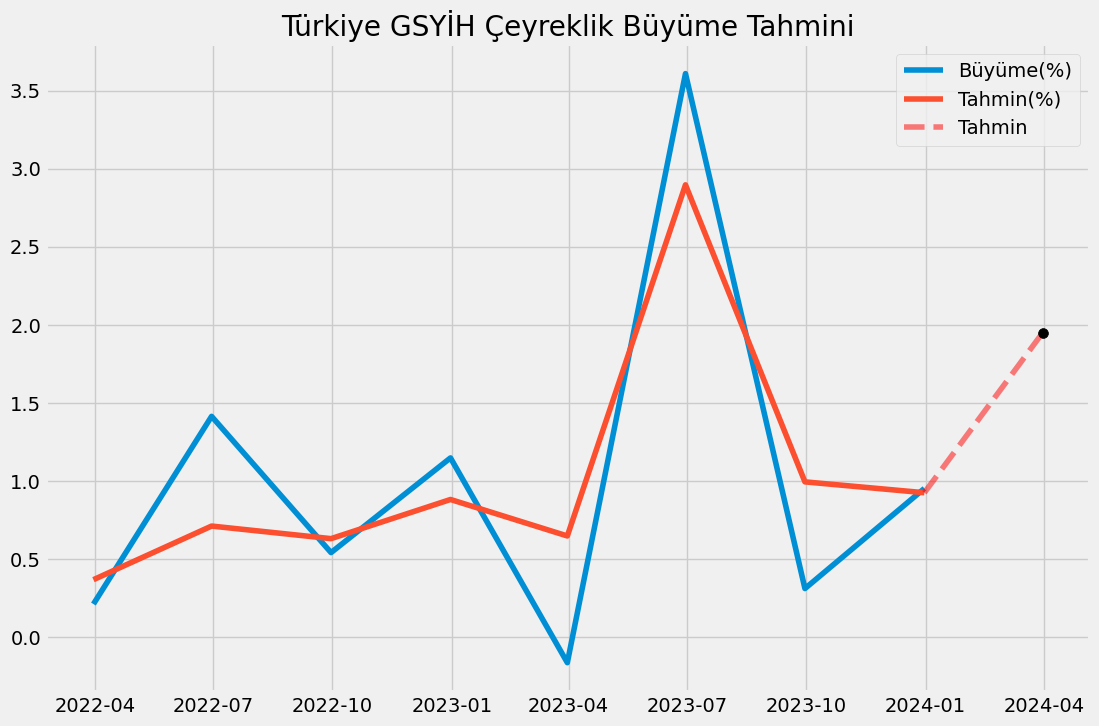

In [251]:
plt.figure(figsize=(12,8))
plt.title("Türkiye GSYİH Çeyreklik Büyüme Tahmini")
plt.plot(tahminler["Büyüme"][:-1],label="Büyüme(%)")
plt.plot(tahminler["Tahmin"][:-1],label="Tahmin(%)")
plt.plot(tahminler["Tahmin"].iloc[-2:],"--",label="Tahmin",color="red",alpha=0.5)
plt.scatter(x=tahminler.index[-1],y=tahminler["Tahmin"][-1],color="black",s=50,zorder=3)
plt.legend()